In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Crystal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('laptop_final.csv')
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0,Intel,Windows
1299,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64,Intel,Windows
1300,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Windows


In [3]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Numerical Feature Engineering

Selecting numerical columns

In [4]:
ndf = df.select_dtypes(include=['int64', 'float64'])
ndf

,Ram,Weight,Price,TouchScreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,128
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,33992.6400,1,1,157.350512,0,128,0,0
1298,16,1.30,79866.7200,1,1,276.053530,0,512,0,0
1299,2,1.50,12201.1200,0,0,111.935204,0,0,0,64
1300,6,2.19,40705.9200,0,0,100.454670,1000,0,0,0


Imputing numerical Features

In [5]:
imputeN = SimpleImputer(strategy = 'mean') 
n_data = imputeN.fit_transform(ndf)

n_df = pd.DataFrame(n_data, columns=ndf.columns)
n_df

,Ram,Weight,Price,TouchScreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
0,8.0,1.37,71378.6832,0.0,1.0,226.983005,0.0,128.0,0.0,0.0
1,8.0,1.34,47895.5232,0.0,0.0,127.677940,0.0,0.0,0.0,128.0
2,8.0,1.86,30636.0000,0.0,0.0,141.211998,0.0,256.0,0.0,0.0
3,16.0,1.83,135195.3360,0.0,1.0,220.534624,0.0,512.0,0.0,0.0
4,8.0,1.37,96095.8080,0.0,1.0,226.983005,0.0,256.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1297,4.0,1.80,33992.6400,1.0,1.0,157.350512,0.0,128.0,0.0,0.0
1298,16.0,1.30,79866.7200,1.0,1.0,276.053530,0.0,512.0,0.0,0.0
1299,2.0,1.50,12201.1200,0.0,0.0,111.935204,0.0,0.0,0.0,64.0
1300,6.0,2.19,40705.9200,0.0,0.0,100.454670,1000.0,0.0,0.0,0.0


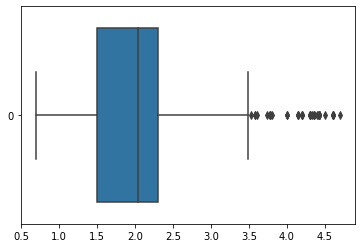

In [6]:
sns.boxplot(data=n_df['Weight'], orient='h')
plt.show()

Removing outlier for 'ppi' weight column

In [7]:
Q1 = n_df.Weight.quantile(0.25)
Q3 = n_df.Weight.quantile(0.75)

IQR = Q3-Q1

ll=Q1-1.5*IQR
ul=Q3+1.5*IQR

rdf = n_df[(n_df.Weight>ll) & (n_df.Weight<ul)]
print(rdf.shape)



(1256, 10)


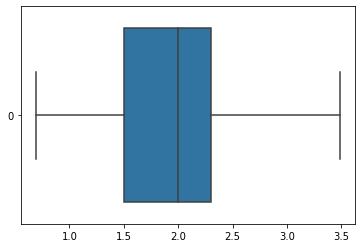

In [8]:
sns.boxplot(data=rdf['Weight'], orient='h')
plt.show()

Saving Outlier removed

In [9]:
outlier_rm = n_df[(n_df.Weight<ll) | (n_df.Weight>ul)]
print(outlier_rm.shape)

(46, 10)


Visualizing ppi column

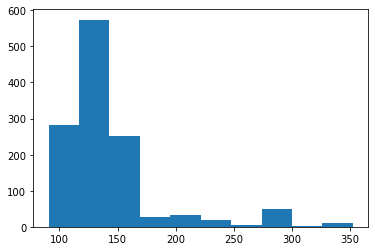

In [10]:
plt.hist(rdf.ppi)
plt.show()

Transforming ppi columns

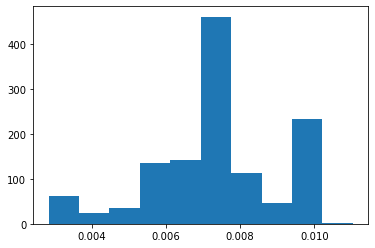

In [11]:
x=np.reciprocal(rdf.ppi)
plt.hist(x)
plt.show()

Assigning transformed value for ppi columns

In [12]:
rdf['ppi'] = x
rdf['ppi']

C:\Users\Crystal\AppData\Local\Temp\ipykernel_14900\2028427442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['ppi'] = x


0       0.004406
1       0.007832
2       0.007082
3       0.004534
4       0.004406
          ...   
1297    0.006355
1298    0.003622
1299    0.008934
1300    0.009955
1301    0.009955
Name: ppi, Length: 1256, dtype: float64

Feature Scaling

In [13]:
rdf.reset_index(inplace=True)
rdf.index

RangeIndex(start=0, stop=1256, step=1)

In [14]:
mn = MinMaxScaler()
# Drop price columns
rd = rdf.drop('Price', axis=1)
mn_data = mn.fit_transform(rd)

mn_df=pd.DataFrame(mn_data, columns=rd.columns)
mn_df['Price'] = rdf['Price']
mn_df

,index,Ram,Weight,TouchScreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,Price
0,0.000000,0.200000,0.242857,0.0,1.0,0.191219,0.00,0.125,0.0,0.000,71378.6832
1,0.000769,0.200000,0.232143,0.0,0.0,0.608975,0.00,0.000,0.0,0.250,47895.5232
2,0.001537,0.200000,0.417857,0.0,0.0,0.517458,0.00,0.250,0.0,0.000,30636.0000
3,0.002306,0.466667,0.407143,0.0,1.0,0.206924,0.00,0.500,0.0,0.000,135195.3360
4,0.003075,0.200000,0.242857,0.0,1.0,0.191219,0.00,0.250,0.0,0.000,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1251,0.996925,0.066667,0.396429,1.0,1.0,0.428909,0.00,0.125,0.0,0.000,33992.6400
1252,0.997694,0.466667,0.217857,1.0,1.0,0.095744,0.00,0.500,0.0,0.000,79866.7200
1253,0.998463,0.000000,0.289286,0.0,0.0,0.743269,0.00,0.000,0.0,0.125,12201.1200
1254,0.999231,0.133333,0.535714,0.0,0.0,0.867744,0.50,0.000,0.0,0.000,40705.9200


In [15]:
mn_df.index

RangeIndex(start=0, stop=1256, step=1)

In [16]:
mn_df.isna().sum()

index            0
Ram              0
Weight           0
TouchScreen      0
Ips              0
ppi              0
HDD              0
SSD              0
Hybrid           0
Flash_Storage    0
Price            0
dtype: int64

# Categorical Feature Engineering

Selecting categorical features

In [17]:
c_data = df.select_dtypes(include=['object'])
c_data

,Company,TypeName,Cpu Brand,Gpu brand,os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others/No Os/Linux
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac
...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1298,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1299,Lenovo,Notebook,Other Intel Processor,Intel,Windows
1300,HP,Notebook,Intel Core i7,AMD,Windows


Imputing categorical features

In [18]:
imputeC = SimpleImputer(strategy='most_frequent')
c_impute = imputeC.fit_transform(c_data)
c_df = pd.DataFrame(c_impute, columns= c_data.columns)
c_df

,Company,TypeName,Cpu Brand,Gpu brand,os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others/No Os/Linux
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac
...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1298,Lenovo,2 in 1 Convertible,Intel Core i7,Intel,Windows
1299,Lenovo,Notebook,Other Intel Processor,Intel,Windows
1300,HP,Notebook,Intel Core i7,AMD,Windows


In [19]:
no_df = c_df[['Company', 'TypeName', 'Gpu brand', 'os']]
no_df
ohe = OneHotEncoder()

nom_data = ohe.fit_transform(no_df).toarray()
nom_df = pd.DataFrame(nom_data, columns=ohe.get_feature_names_out())
nom_df

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No Os/Linux,os_Windows
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Encoding ordinal features

In [20]:

oe = OrdinalEncoder(categories=[['Intel Core i3', 'Intel Core i5', 'Other Intel Processor', 'Intel Core i7', 'AMD Processor']])

odf = oe.fit_transform(c_df[['Cpu Brand']])
ordi_df = pd.DataFrame(odf, columns=['Cpu Brand'])
ordi_df

,Cpu Brand
0,1.0
1,1.0
2,1.0
3,3.0
4,1.0
...,...
1297,3.0
1298,3.0
1299,2.0
1300,3.0


Combining nominal and ordinal features

In [21]:
cate_df = pd.concat([nom_df, ordi_df], axis=1)
cate_df.isna().sum()

Company_Acer                   0
Company_Apple                  0
Company_Asus                   0
Company_Chuwi                  0
Company_Dell                   0
Company_Fujitsu                0
Company_Google                 0
Company_HP                     0
Company_Huawei                 0
Company_LG                     0
Company_Lenovo                 0
Company_MSI                    0
Company_Mediacom               0
Company_Microsoft              0
Company_Razer                  0
Company_Samsung                0
Company_Toshiba                0
Company_Vero                   0
Company_Xiaomi                 0
TypeName_2 in 1 Convertible    0
TypeName_Gaming                0
TypeName_Netbook               0
TypeName_Notebook              0
TypeName_Ultrabook             0
TypeName_Workstation           0
Gpu brand_AMD                  0
Gpu brand_Intel                0
Gpu brand_Nvidia               0
os_Mac                         0
os_Others/No Os/Linux          0
os_Windows

In [22]:
cate_df.shape

(1302, 32)

Droping outlier from categorical features

In [23]:
cate_df.drop(outlier_rm.index, inplace=True)
print("shape after removal", cate_df.shape)

shape after removal (1256, 32)


Combining categorical and numerical feature

In [24]:
# cate_df.reset_index(inplace=True)
cate_df.index
cate_df.reset_index(inplace=True)

In [25]:
cate_df.index

RangeIndex(start=0, stop=1256, step=1)

In [26]:
mn_df.index

RangeIndex(start=0, stop=1256, step=1)

Combining categorical and numerical features

In [27]:
alldf = pd.concat([cate_df, mn_df], axis=1)
alldf

,index,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,Ram,Weight,TouchScreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,Price
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200000,0.242857,0.0,1.0,0.191219,0.00,0.125,0.0,0.000,71378.6832
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200000,0.232143,0.0,0.0,0.608975,0.00,0.000,0.0,0.250,47895.5232
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.200000,0.417857,0.0,0.0,0.517458,0.00,0.250,0.0,0.000,30636.0000
3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.466667,0.407143,0.0,1.0,0.206924,0.00,0.500,0.0,0.000,135195.3360
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200000,0.242857,0.0,1.0,0.191219,0.00,0.250,0.0,0.000,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,0.396429,1.0,1.0,0.428909,0.00,0.125,0.0,0.000,33992.6400
1252,1298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.466667,0.217857,1.0,1.0,0.095744,0.00,0.500,0.0,0.000,79866.7200
1253,1299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.289286,0.0,0.0,0.743269,0.00,0.000,0.0,0.125,12201.1200
1254,1300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.133333,0.535714,0.0,0.0,0.867744,0.50,0.000,0.0,0.000,40705.9200


In [28]:
alldf.drop(['index'], axis=1, inplace=True)

In [29]:
alldf.isna().sum()

Company_Acer                   0
Company_Apple                  0
Company_Asus                   0
Company_Chuwi                  0
Company_Dell                   0
Company_Fujitsu                0
Company_Google                 0
Company_HP                     0
Company_Huawei                 0
Company_LG                     0
Company_Lenovo                 0
Company_MSI                    0
Company_Mediacom               0
Company_Microsoft              0
Company_Razer                  0
Company_Samsung                0
Company_Toshiba                0
Company_Vero                   0
Company_Xiaomi                 0
TypeName_2 in 1 Convertible    0
TypeName_Gaming                0
TypeName_Netbook               0
TypeName_Notebook              0
TypeName_Ultrabook             0
TypeName_Workstation           0
Gpu brand_AMD                  0
Gpu brand_Intel                0
Gpu brand_Nvidia               0
os_Mac                         0
os_Others/No Os/Linux          0
os_Windows

In [35]:
x=alldf.drop('Price', axis=1)
y=alldf['Price']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [37]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1004, 41) (1004,)
(252, 41) (252,)


# Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Linear Regression", lr.score(x_train, y_train))
print("Linear Regression", lr.score(x_test, y_test))

Linear Regression 0.7477570214443696
Linear Regression 0.7211611374585976


# Decision Tree

In [39]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
print("Decision Tree Regressor", dt.score(x_train, y_train))
print("Decision Tree Regressor", dt.score(x_test, y_test))

Decision Tree Regressor 0.9954430271068819
Decision Tree Regressor 0.5653127098461367


# KNN

In [40]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
print("KNN Regressor", knn.score(x_train, y_train))
print("KNN Regressor", knn.score(x_test, y_test))

KNN Regressor 0.7650301544844871
KNN Regressor 0.7234615569695187


# Lasso

In [41]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)
print("Lasso Regressor", lasso_model.score(x_train, y_train))
print("Lasso Regressor", lasso_model.score(x_test, y_test))

Lasso Regressor 0.747757021063466
Lasso Regressor 0.7211617071681943


C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+10, tolerance: 1.246e+08
  model = cd_fast.enet_coordinate_descent(


# Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso = Lasso()
grid_search_la = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
grid_search_la.fit(x_train, y_train)


C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.686e+10, tolerance: 9.734e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+10, tolerance: 9.173e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.425e+10, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]})

In [43]:
grid_search_la.best_params_

{'alpha': 10.0}

In [44]:
grid_search_la.best_estimator_

Lasso(alpha=10.0)

In [45]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(x_train, y_train)
print("Lasso Regressor", lasso_model.score(x_train, y_train))
print("Lasso Regressor", lasso_model.score(x_test, y_test))

Lasso Regressor 0.7477570214405606
Lasso Regressor 0.7211611944657338


C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+10, tolerance: 1.246e+08
  model = cd_fast.enet_coordinate_descent(


# Cross Validation

In [46]:
kf = KFold(n_splits=4)
x1=alldf.drop('Price', axis=1)
y1=alldf['Price']
score =[]
for train_index, test_index in kf.split(x,y):
    x1_train, x1_test = x1.iloc[train_index],x1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
    
    lasso_model.fit(x1_train, y1_train)
    s = lasso_model.score(x1_test, y1_test)
    score.append(s)
score

C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.628e+10, tolerance: 1.145e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e+10, tolerance: 1.110e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Crystal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.850e+10, to

[0.7186824225153938, 0.7570375488143519, 0.6905209645707471, 0.601791413623614]

Average of cross validation

In [47]:
tot_score =0
for i in score:
    tot_score = (tot_score+i)
(tot_score*100)/4

69.20080873810267

# KNN

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define input features and target variable]

# Define the parameter grid
param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create an instance of KNeighborRegressor
model = KNeighborsRegressor()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [49]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [50]:
grid_search.best_estimator_

KNeighborsRegressor(p=1, weights='distance')

In [51]:
knn=KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')
knn.fit(x_train, y_train)
print("KNN Regressor", knn.score(x_train, y_train))
print("KNN Regressor", knn.score(x_test, y_test))

KNN Regressor 0.9954430271068819
KNN Regressor 0.7771969198357555


In [52]:
kf = KFold(n_splits=4)
x1=alldf.drop('Price', axis=1)
y1=alldf['Price']
score =[]
for train_index, test_index in kf.split(x,y):
    x1_train, x1_test = x1.iloc[train_index],x1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
    
    knn.fit(x1_train, y1_train)
    s = knn.score(x1_test, y1_test)
    score.append(s)
score

[0.704402200747628, 0.6468897816532844, 0.7288203241796047, 0.6140015975976916]

In [53]:
tot_score =0
for i in score:
    tot_score = (tot_score+i)
(tot_score*100)/4

67.3528476044552

# AdaBoostRegressor Hyperparameter Tune

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
ada_boost = AdaBoostRegressor()
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0], 
}


In [56]:

grid_search = GridSearchCV(ada_boost, params, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [65]:

best_params = grid_search.best_params_ 
best_params

{'learning_rate': 0.1, 'n_estimators': 50}

In [66]:
best_model = AdaBoostRegressor(learning_rate=0.1, n_estimators=50)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [69]:
print(best_model.score(x_train, y_train))

0.7089006793922498


In [70]:
print(best_model.score(x_test, y_test))

0.5653810962045986
